<a href="https://colab.research.google.com/github/melisamichuki01/Statististics-with-python/blob/main/ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task One: Time Series and Explanatory Data Analysis

__Data and Dataset__:

* Shampoo Sales Dataset : monthly number of sales of shampoo over a 3 year period.
* Minimum Daily Temperatures Dataset : minimum daily temperatures over 10 years (1981-1990) in the city Melbourne, Australia.
* Monthly Sunspot Dataset : monthly count of the number of observed sunspots for just over 230 years (1749-1983).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("/content/Sunspots.csv", index_col= 0)

In [2]:
df.head()

,Date,Monthly Mean Total Sunspot Number
0,1749-01-31,96.7
1,1749-02-28,104.3
2,1749-03-31,116.7
3,1749-04-30,92.8
4,1749-05-31,141.7


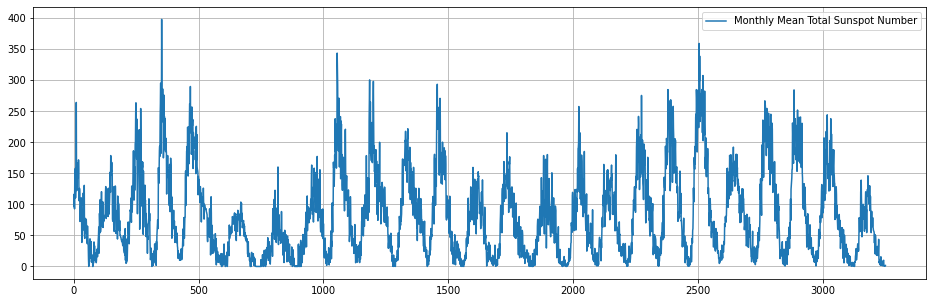

In [3]:
df.plot(figsize = (16,5), grid= True)

In [4]:
df1 = pd.read_csv("/content/shampoo.csv", index_col= 0)

In [5]:
df1.head()

,Sales
Month,
1-01,266.0
1-02,145.9
1-03,183.1
1-04,119.3
1-05,180.3


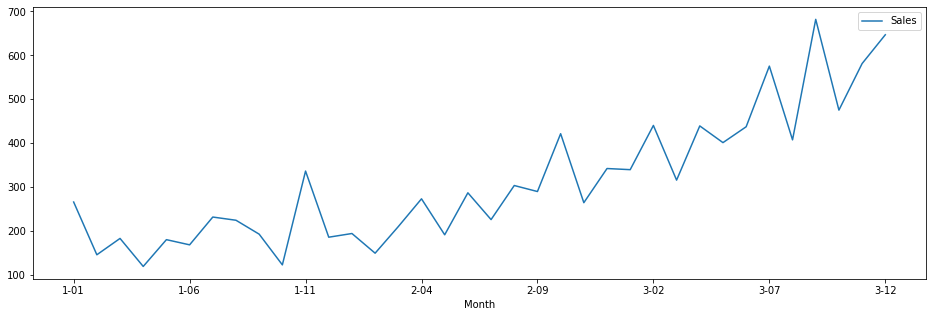

In [6]:
df1.plot(figsize= (16,5))

__SARIMA(p, d, q)(P, D, Q, s):__

* __Autoregression - AR(p):__
Y = B0 + B1*Y_lag1 + B2*Y_lag2 + ... + Bn*Y_lagn

* __Moving Average - MA(q):__ Y = B0 + B1*E_lag1 + B2*E_lag2 + ... + Bn*E_lagn

* __Integrated - (d)__: Y_forward1 - Y = B0 + B1*(Y - Y_lag1) + B2*(Y_lag1 - Y_lag2) +..

__Example: ARMA(1,0,1)__

yt = 0.5 * yt −1 + 0.2 * ϵt−1 + ϵt

In [7]:
from statsmodels.tsa.arima_process import arma_generate_sample

ar_cof = [1 , 0.5]
ma_cof = [1, 0.2]

y = arma_generate_sample(ar_cof, ma_cof, nsample = 100)

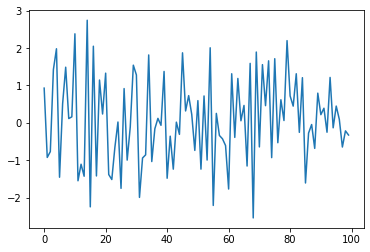

In [8]:
plt.plot(y)

# Task Two: Stationarity and ADF Test

## (AR + I + MA) = ARIMA(p,d,q)


- Time Series is said to be stationary if its statistical properties such as mean, variance remain constant over time 
- ADF : The augmented Dicky-Fuller test:

 Null Hypothesis: Series is not stationary

 Alternate Hypothesis: Series is stationary

In [9]:
from statsmodels.tsa.stattools import adfuller

adfuller(df['Monthly Mean Total Sunspot Number'])

(-10.480868432669848,
 1.2147141586504414e-18,
 28,
 3223,
 {'1%': -3.4323805665026175,
  '10%': -2.5672475896829807,
  '5%': -2.8624371819849372},
 29726.17960863342)

In [10]:
adfuller(df1['Sales'])

(3.0601420836411823,
 1.0,
 10,
 25,
 {'1%': -3.7238633119999998, '10%': -2.6328004, '5%': -2.98648896},
 278.9972644263031)

__Result:__ 

* 0th element is test statistic ,more negative means more likely to be stationary

* 1st element is p-value
If p-value is small→reject null hypothesis. Reject non-stationary.

* 2nd lags used

* 3d num of observations

* 4th element is the critical test statistics

__Making a time series stationary:__
Taking the difference Δyt = yt − yt−1

In [11]:
#df_stationary = df.diff()
#df_stationary = df.diff().dropna()

In [12]:
df_stationary = df1['Sales'].diff()

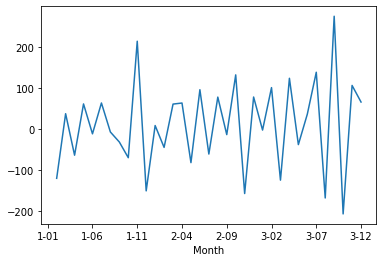

In [13]:
df_stationary.plot()

__Examples of other transforms:__

Take the log
np.log(df)

Take the square root
np.sqrt(df)

Take the proportional change
df.shift(1)/df

# Task Three: Autocorrelation, ACF and PACF


__ACF:__ Autocorrelation Function

__PACF:__  Partial autocorrelation function

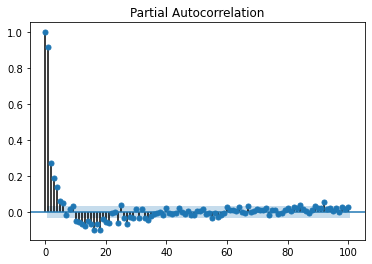

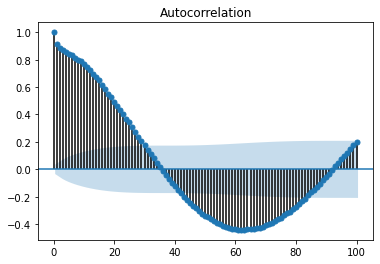

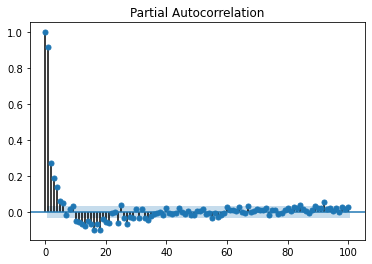

In [14]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(df['Monthly Mean Total Sunspot Number'].tolist(), lags = 100)
plot_pacf(df['Monthly Mean Total Sunspot Number'].tolist(), lags = 100)

# Task Four: ARIMA Model

In [15]:
Train = df.iloc[:2000, 1]
Test = df.iloc[2000:, 1]

In [16]:
Train

0        96.7
1       104.3
2       116.7
3        92.8
4       141.7
        ...  
1995     68.9
1996     55.1
1997    114.7
1998    119.4
1999    116.0
Name: Monthly Mean Total Sunspot Number, Length: 2000, dtype: float64

In [17]:
Train = [x for x in Train]
Test = [x for x in Train]
Train

[96.7,
 104.3,
 116.7,
 92.8,
 141.7,
 139.2,
 158.0,
 110.5,
 126.5,
 125.8,
 264.3,
 142.0,
 122.2,
 126.5,
 148.7,
 147.2,
 150.0,
 166.7,
 142.3,
 171.7,
 152.0,
 109.5,
 105.5,
 125.7,
 116.7,
 72.5,
 75.5,
 94.0,
 101.2,
 84.5,
 110.5,
 99.7,
 39.2,
 38.7,
 47.5,
 73.3,
 58.3,
 83.3,
 118.3,
 98.8,
 99.5,
 66.0,
 130.7,
 48.8,
 45.2,
 77.7,
 62.7,
 66.7,
 73.3,
 53.3,
 76.2,
 63.3,
 60.0,
 52.8,
 36.7,
 65.0,
 46.7,
 41.7,
 33.3,
 11.2,
 0.0,
 5.0,
 2.8,
 22.8,
 34.5,
 44.5,
 31.3,
 20.5,
 13.7,
 40.2,
 22.0,
 7.0,
 17.0,
 18.7,
 11.3,
 10.8,
 0.0,
 0.0,
 14.3,
 5.3,
 29.7,
 39.5,
 11.3,
 33.3,
 20.8,
 11.8,
 9.0,
 15.7,
 20.8,
 21.5,
 6.0,
 10.7,
 19.7,
 23.8,
 28.3,
 15.7,
 23.5,
 35.3,
 43.7,
 50.0,
 63.5,
 21.3,
 41.7,
 85.5,
 66.2,
 54.2,
 107.8,
 55.8,
 62.7,
 86.7,
 81.7,
 120.5,
 77.3,
 75.0,
 73.3,
 64.5,
 104.2,
 62.8,
 71.7,
 71.7,
 80.5,
 73.3,
 78.0,
 78.3,
 81.7,
 83.3,
 85.0,
 118.8,
 128.7,
 99.5,
 77.2,
 95.0,
 112.2,
 99.2,
 124.5,
 97.2,
 120.0,
 80.5,
 110.0,


In [62]:
from statsmodels.tsa.arima_model import ARIMA

pred = []
low_bound = []
up_bound =  []

for data in range(len(Test)):
  model = ARIMA(Train, order= (5,0,2))
  model_fit = model.fit()
  out = model_fit.forecast()

  result = out[0]
  lower = out[2][0][0]
  upper = out[2][0][1]

  pred.append(result)
  low_bound.append(lower)
  up_bound.append(upper)

  obs = Test[data]
  Train.append(obs)

  print('Actual value:', obs, 'Prediction:', result)





/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:668: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:668: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:669: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:669: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()


Actual value: 96.7 Prediction: [18.54371184]


KeyboardInterrupt: ignored

In [63]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                 2098
Model:                     ARMA(5, 2)   Log Likelihood               -9727.283
Method:                       css-mle   S.D. of innovations             24.950
Date:                Sat, 08 May 2021   AIC                          19472.567
Time:                        16:17:42   BIC                          19523.405
Sample:                             0   HQIC                         19491.188
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         75.6075      6.156     12.283      0.000      63.543      87.672
ar.L1.y        2.2618      0.037     60.318      0.000       2.188       2.335
ar.L2.y       -1.5375      0.072    -21.278      0.000      -1.679      -1.396
ar.L3.y        0.2259      0.067      3.390      0.001       0.095       0.357
ar.L4.y        0.0810      0.056      1.440      0.150      -0.029       0.191
ar.L5.y       -0.0332      0.026     -1.280      0.201      -0.084       0.018
ma.L1.y       -1.7728      0.030    -59.818      0.000      -1.831      -1.715
ma.L2.y        0.7956      0.030     26.310      0.000       0.736       0.855
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0155           -0.0515j            1.0168           -0.0081
AR.2            1.0155           +0.0515j            1.0168            0.0081
AR.3           -3.8328           -0.0000j            3.8328           -0.5000
AR.4            2.1186           -1.7612j            2.7550           -0.1104
AR.5            2.1186           +1.7612j            2.7550            0.1104
MA.1            1.1141           -0.1253j            1.1211           -0.0178
MA.2            1.1141           +0.1253j            1.1211            0.0178
-----------------------------------------------------------------------------
"""

__AIC - Akaike information criterion__

Lower AIC indicates a better model

AIC likes to choose simple models with lower order

__BIC - Bayesian information criterion__


Lower BIC indicates a better model

BIC likes to choose simple models with lower order

In [ ]:
import matplotlib as mpl

mpl.rcParams['figure.figsize'] = (18, 7)
mpl.rcParams['axes.grid'] = False

# plot
plt.plot(Test,color='black',linewidth=1)
plt.plot(low_bound,color='red',linewidth=1)
plt.plot(up_bound,color='green',linewidth=1)
plt.plot(pred,linewidth=1)
plt.show()

# Task Five: ARIMA Automation

In [64]:
!pip install pmdarima

     |████████████████████████████████| 1.5MB 5.5MB/s 
     |████████████████████████████████| 9.5MB 21.1MB/s 
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [21]:
import pmdarima as pm

model = pm.auto_arima(df['Monthly Mean Total Sunspot Number'], m = 11, seasonal = True,start_q =0,start_p =0, max_order=5,error_action = 'ignore', stepwise =True, trace=True )

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(1,0,1)[11] intercept   : AIC=33844.892, Time=6.17 sec
 ARIMA(0,0,0)(0,0,0)[11] intercept   : AIC=36662.504, Time=0.10 sec
 ARIMA(1,0,0)(1,0,0)[11] intercept   : AIC=30651.060, Time=4.39 sec
 ARIMA(0,0,1)(0,0,1)[11] intercept   : AIC=33078.193, Time=4.57 sec
 ARIMA(0,0,0)(0,0,0)[11]             : AIC=39591.690, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[11] intercept   : AIC=30655.087, Time=0.28 sec
 ARIMA(1,0,0)(2,0,0)[11] intercept   : AIC=30652.587, Time=14.97 sec
 ARIMA(1,0,0)(1,0,1)[11] intercept   : AIC=30652.715, Time=4.62 sec
 ARIMA(1,0,0)(0,0,1)[11] intercept   : AIC=30651.231, Time=3.46 sec
 ARIMA(1,0,0)(2,0,1)[11] intercept   : AIC=30654.714, Time=17.73 sec
 ARIMA(0,0,0)(1,0,0)[11] intercept   : AIC=33995.544, Time=3.37 sec
 ARIMA(2,0,0)(1,0,0)[11] intercept   : AIC=30402.095, Time=5.56 sec
 ARIMA(2,0,0)(0,0,0)[11] intercept   : AIC=30404.772, Time=0.30 sec
 ARIMA(2,0,0)(2,0,0)[11] intercept   : AIC=30403.887, Time=20.18 sec
 A

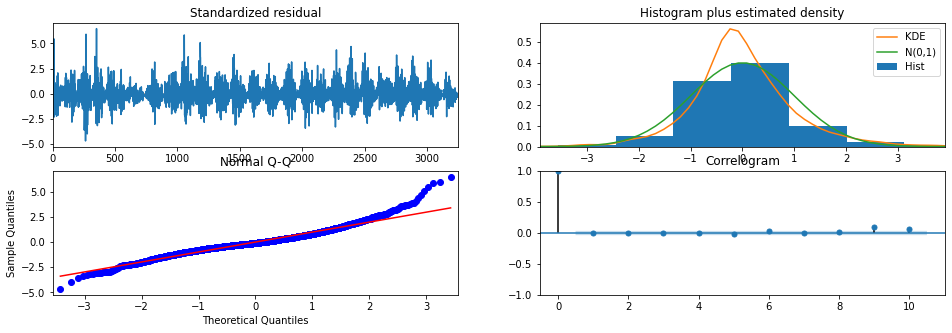

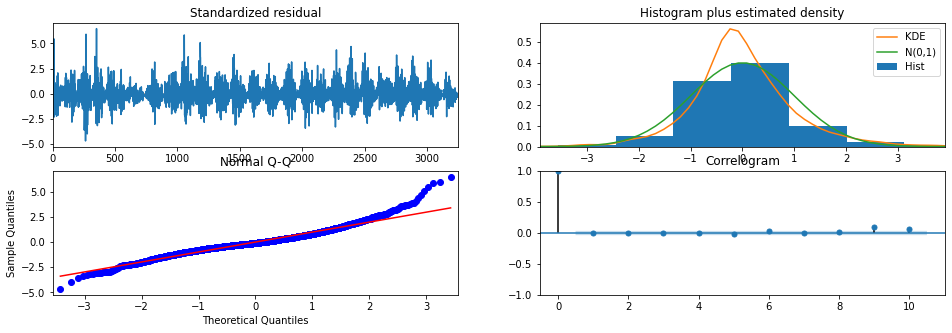

In [22]:
model.plot_diagnostics(figsize=(16,5))